# **Image Preprocessing**

### Import ImageDataGenerator Library And Configure It

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)


In [90]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import pathlib

##Apply ImageDataGenerator Functionality To Train And Test Set

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900,color_mode = "grayscale")
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900,color_mode = "grayscale")


In [ ]:
print("Len x-train : ",len(x_train))
print("Len x-test : ", len(x_test))

In [ ]:
# The Class Indices in Training Dataset
x_train.class_indices

In [ ]:
# The Class Indices in Test Dataset
x_test.class_indices

#**Model building**

##Import The Required Model Building Libraries

In [ ]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

##Initialize The Model

In [ ]:
# Creating Model
model=Sequential()

##Add The Convolution Layer

In [ ]:
# Adding The Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

##Add The Pooling Layer

In [ ]:
# Adding The Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

##Add The Flatten Layer

In [ ]:
# Adding The Flatten Layer
model.add(Flatten())

## Add the Dense Layers

In [ ]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

## Compilie the Model

In [ ]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##Fit And Save The Model

In [87]:
# Fitting the Model Generator
model.fit(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
18/18 [==============================] - 2824s 157s/step - loss: 1.0592 - accuracy: 0.6450 - val_loss: 0.4096 - val_accuracy: 0.8867
Epoch 2/10
18/18 [==============================] - 85s 5s/step - loss: 0.2092 - accuracy: 0.9427 - val_loss: 0.2497 - val_accuracy: 0.9502
Epoch 3/10
18/18 [==============================] - 81s 4s/step - loss: 0.0777 - accuracy: 0.9794 - val_loss: 0.2169 - val_accuracy: 0.9644
Epoch 4/10
18/18 [==============================] - 82s 5s/step - loss: 0.0374 - accuracy: 0.9908 - val_loss: 0.2397 - val_accuracy: 0.9684
Epoch 5/10
18/18 [==============================] - 80s 4s/step - loss: 0.0232 - accuracy: 0.9945 - val_loss: 0.2474 - val_accuracy: 0.9760
Epoch 6/10
18/18 [==============================] - 83s 5s/step - loss: 0.0133 - accuracy: 0.9976 - val_loss: 0.2843 - val_accuracy: 0.9747
Epoch 7/10
18/18 [==============================] - 81s 4s/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.2875 - val_accuracy: 0.9756
Epoch 8/10
18/18

In [93]:
# Saving The Model
model.save('asl_model_84_54.h5')

#Test The Model


##Import The Packages And Load The Saved Model

In [95]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [97]:
model=load_model('asl_model_84_54.h5')
img=image.load_img(r'/content/drive/MyDrive/Dataset/Dataset/test_set/D/2.png',
                   target_size=(64,64))

##Load The Test Image, Pre-Process It And Predict


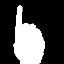

In [98]:
img

In [99]:
x=image.img_to_array(img)

In [100]:
x.ndim

3

In [101]:
x=np.expand_dims(x,axis=0)

In [102]:
x.ndim

4

In [103]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 137ms/step


In [104]:
pred

array([3])

In [105]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

D


##OPEN CV


In [106]:
import cv2

In [107]:
img=cv2.imread(r'/content/drive/MyDrive/Dataset/Dataset/test_set/C/2.png',1)

In [108]:
img1=cv2.imread(r'/content/drive/MyDrive/Dataset/Dataset/test_set/B/2.png',0)

In [109]:
print(img.shape)

(64, 64, 3)


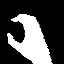

In [110]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()